In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [6]:
y_train_full[0]

5

In [7]:
X_train_full[0].shape

(28, 28)

In [8]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

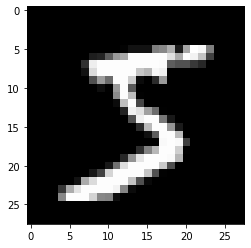

In [9]:
plt.imshow(img, cmap='gray')

In [10]:
y_train_full[0]

5

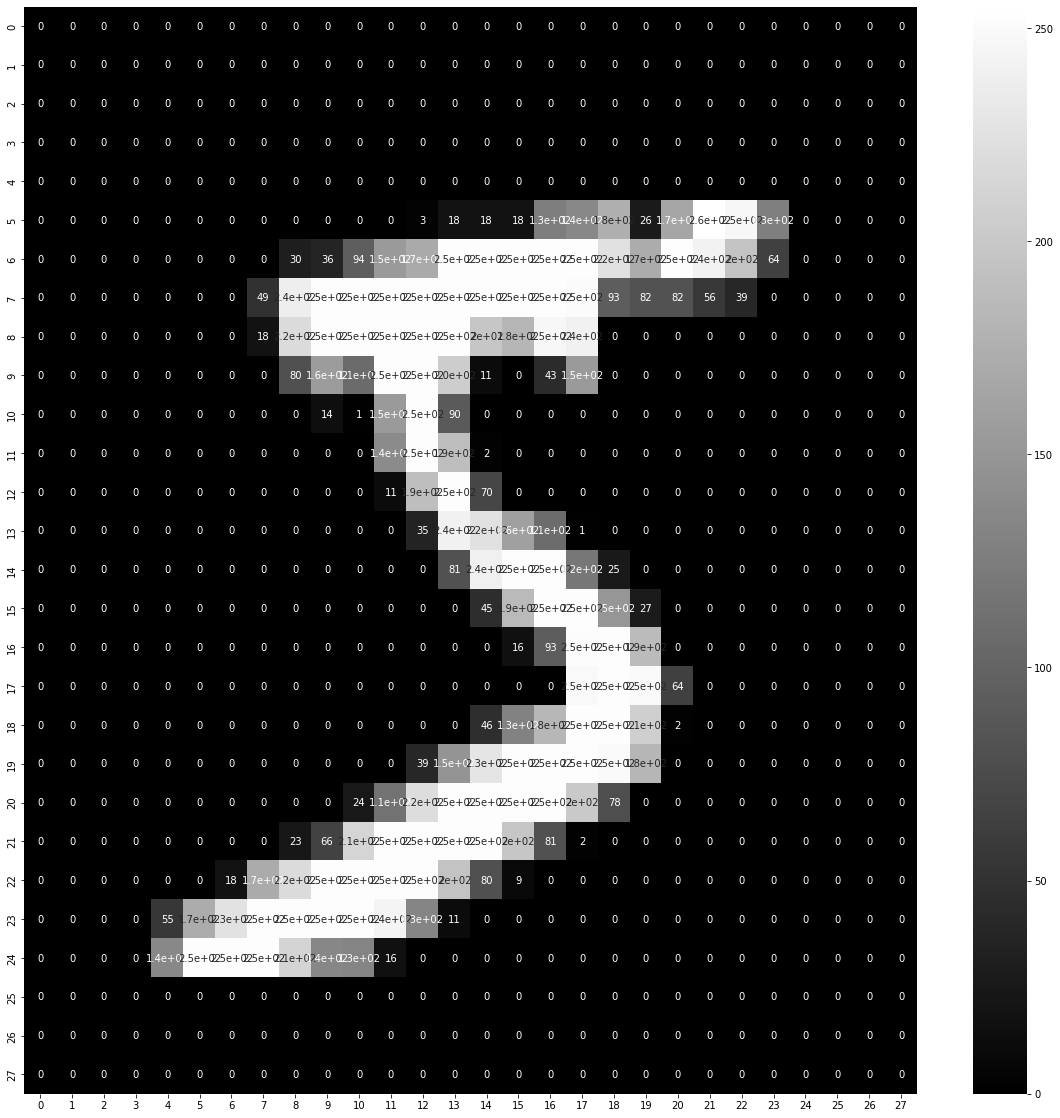

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(img, annot=True,cmap='gray')

ANN Model


In [12]:
X_valid, X_train = X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

X_test = X_test/255

In [13]:
CLASSES = len(np.unique(y_train))

CLASSES

10

In [14]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28), name="inputLayer"),
    tf.keras.layers.Dense(300, activation='relu', name="hiddenLayer01"),
    tf.keras.layers.Dense(100, activation='relu', name="hiddenLayer02"),
    tf.keras.layers.Dense(10, activation='softmax', name="outputLayer")
]

In [15]:
model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS,metrics=METRICS)

In [17]:
EPOCHS = 30

VALIDATION = (X_valid,y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    validation_data=VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5985 - accuracy: 0.8442 - val_loss: 0.3047 - val_accuracy: 0.9162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2885 - accuracy: 0.9183 - val_loss: 0.2465 - val_accuracy: 0.9290
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2370 - accuracy: 0.9327 - val_loss: 0.2063 - val_accuracy: 0.9398
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2026 - accuracy: 0.9419 - val_loss: 0.1870 - val_accuracy: 0.9470
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1769 - accuracy: 0.9495 - val_loss: 0.1626 - val_accuracy: 0.9530
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1565 - accuracy: 0.9555 - val_loss: 0.1448 - val_accuracy: 0.9606
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1401 - accuracy: 0.9597 - val_loss: 0.1349 - val_accuracy:

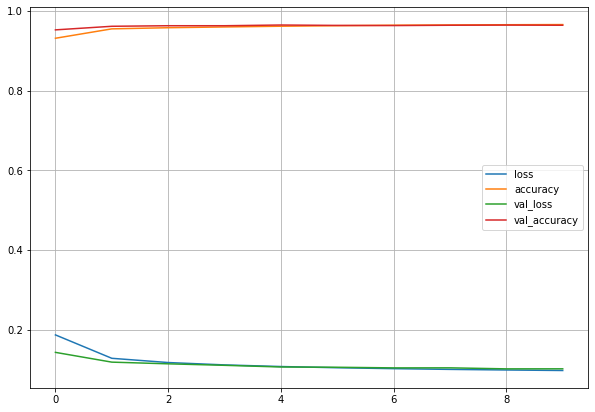

In [50]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()


In [51]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9777


[0.07102944701910019, 0.9776999950408936]

In [52]:
model_clf.save("MNIST_full.h5")

In [53]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

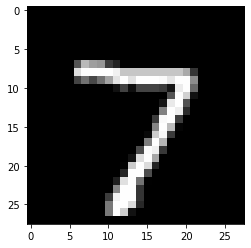

In [54]:
plt.imshow(X_new[0],cmap='gray')

In [55]:
Y_pred = np.argmax(y_prob, axis = -1)
Y_pred

array([7, 2, 1])

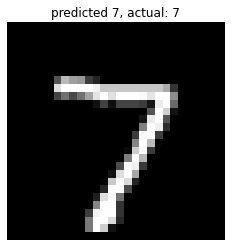

------------------------------


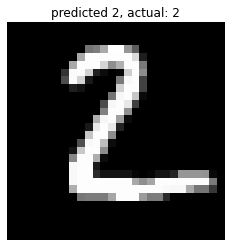

------------------------------


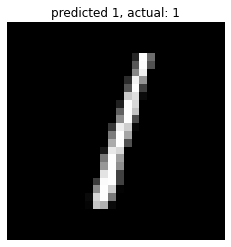

------------------------------


In [56]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap='gray')
    plt.title(f"predicted {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*15)


# Transfer Learning

## New Problem Statement

Check if even or odd no.

In [57]:
pretrained_model = tf.keras.models.load_model("MNIST_full.h5")

In [58]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [59]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [60]:
for layer in pretrained_model.layers[:-1]:
    layer.trainable = False

In [61]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [62]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [63]:
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2,activation="softmax")
)

In [64]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [65]:
def update_labels(labels):
    for idx,label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0 , 1 , 0)
    return labels

In [66]:
y_train_bin, y_test_bin, y_valid_bin = update_labels([y_train, y_test, y_valid]) 

In [67]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [68]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10,validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1847 - accuracy: 0.9298 - val_loss: 0.1337 - val_accuracy: 0.9504
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1294 - accuracy: 0.9541 - val_loss: 0.1211 - val_accuracy: 0.9600
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1178 - accuracy: 0.9580 - val_loss: 0.1119 - val_accuracy: 0.9618
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1118 - accuracy: 0.9602 - val_loss: 0.1097 - val_accuracy: 0.9618
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1075 - accuracy: 0.9616 - val_loss: 0.1052 - val_accuracy: 0.9636
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1044 - accuracy: 0.9627 - val_loss: 0.1029 - val_accuracy: 0.9634
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1022 - accuracy: 0.9638 - val_loss: 0.1017 - val_accuracy

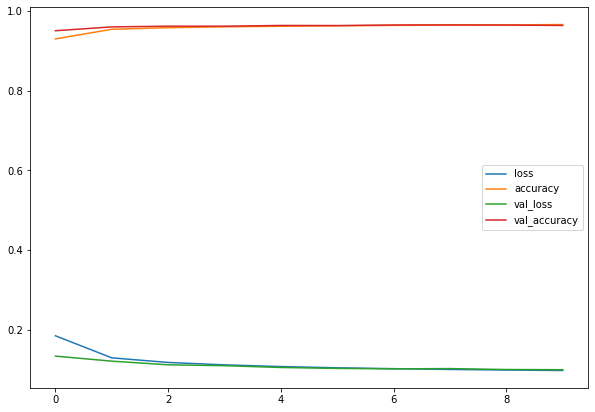

In [69]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

In [70]:
new_model.evaluate(X_test,y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1016 - accuracy: 0.9634


[0.10162246972322464, 0.9634000062942505]

In [71]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

array([[0.997, 0.003],
       [0.002, 0.998],
       [0.955, 0.045]], dtype=float32)

In [72]:
Y_pred = np.argmax(y_prob, axis = -1)
Y_pred

array([0, 1, 0])

In [73]:
y_test_bin[:3]

array([0, 1, 0])

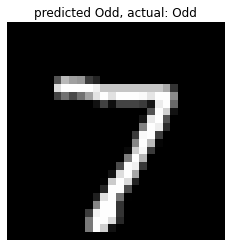

------------------------------


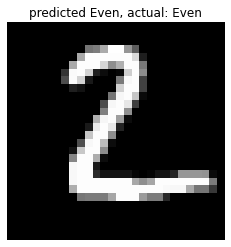

------------------------------


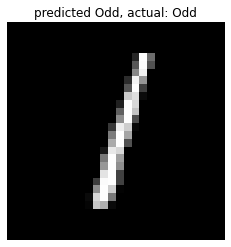

------------------------------


In [74]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "Even"
    else:
        pred = "Odd"
    if actual == 1:
        actual = "Even"
    else:
        actual = "Odd"
    plt.imshow(img_array, cmap='gray')
    plt.title(f"predicted {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*15)


# Train A CNN model on MNIST data

In [75]:
X_train[0].shape

(28, 28)

In [76]:
np.expand_dims(X_train, -1).shape

(55000, 28, 28, 1)

In [77]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [78]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [79]:
X_train_CNN[0].shape

(28, 28, 1)

In [80]:
input_shape = (28, 28, 1) # (row, col, channels)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [81]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [82]:
CNN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [85]:
CNN_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [86]:
history = CNN_model.fit(
    X_train_CNN, y_train, epochs=10,validation_data = (X_valid_CNN, y_valid)
)

Epoch 1/10
1719/1719 [==============================] - 13s 4ms/step - loss: 0.5695 - accuracy: 0.8353 - val_loss: 0.2040 - val_accuracy: 0.9418
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1780 - accuracy: 0.9478 - val_loss: 0.1308 - val_accuracy: 0.9644
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1242 - accuracy: 0.9633 - val_loss: 0.1071 - val_accuracy: 0.9708
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1004 - accuracy: 0.9695 - val_loss: 0.0903 - val_accuracy: 0.9736
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9739 - val_loss: 0.0787 - val_accuracy: 0.9776
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0765 - accuracy: 0.9771 - val_loss: 0.0761 - val_accuracy: 0.9762
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0695 - accuracy: 0.9785 - val_loss: 0.0680 - val_accuracy

In [87]:
CNN_model.evaluate(X_test_CNN,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9818


[0.056189317256212234, 0.9818000197410583]

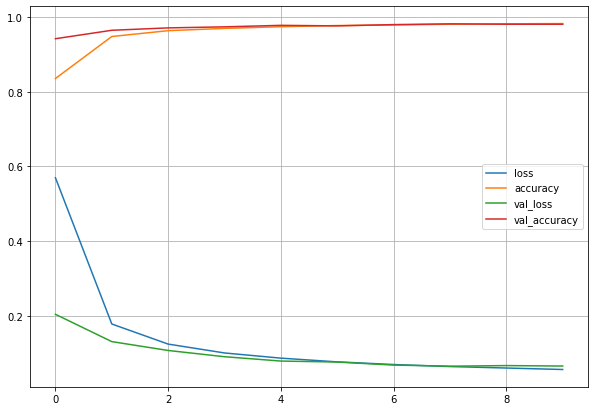

In [88]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [90]:
CNN_model.save("mnist_cnn.h5")

In [91]:
X_new = X_test[:3]

y_prob = CNN_model.predict(X_new)
y_prob.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [92]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

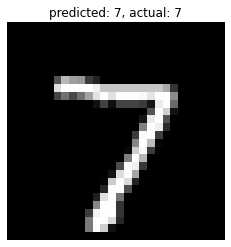

------------------------------------------------------------


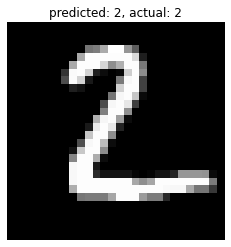

------------------------------------------------------------


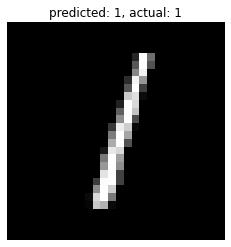

------------------------------------------------------------


In [93]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)